# Random Forest Model

In this project we will build a Random Forest model using the case study below

#### Case Study:  
 

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In this activity, your goal will be to utilize a Random Forest model to predict whether or not a customer will be satisfied with their flight experience. 

## Step 1: Imports

Import relevant Python packages

In [95]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

pd.set_option('display.max_columns', None)

#### Load the dataset

In [96]:
# load data
airline_df = pd.read_csv(r"C:\Users\Ghost\Desktop\project_files\Files\Invistico_Airline.csv")

#### **Data overview and summary statistics**

Use the following methods and attribute on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [97]:
airline_df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [98]:
airline_df.shape

(129880, 22)

Generate summary statistics using the `describe()` method.

In [99]:
airline_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Check summary information using the `info()` method.

In [100]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

## Step 2: Data exploration, data cleaning, and model preparation

Change column names to lower case and replace space with underscore

In [101]:
# change column names to lower case
airline_df.columns = airline_df.columns.str.lower()

# replace space with underscore in column names
airline_df.columns = airline_df.columns.str.replace(' ', '_')

# confirm changes
airline_df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Check value count for categorical features 

In [102]:
airline_df['type_of_travel'].value_counts()

type_of_travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [103]:
airline_df['class'].value_counts()

class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [104]:
airline_df['customer_type'].value_counts()

customer_type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Check class balance for target variable (satisfaction)

In [105]:
round(airline_df['satisfaction'].value_counts(normalize = True)  * 100, 2)

satisfaction
satisfied       54.73
dissatisfied    45.27
Name: proportion, dtype: float64

our target variable has a good balance with satisfied passengers representing 54.74% of our dataset and unsatisfied passengers making up the remaining 45.26%

Check for missing values using the `isna()` method

In [106]:
airline_df.isna().sum()

satisfaction                           0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

only arrival_delay_in_minutes has missing values, amounting to 393. This is a very small percentage of our dataset so we can remove the rows with missing values

In [107]:
# drop missing values
airline_df = airline_df.dropna(axis = 0)

# confirm changes 
airline_df.isna().sum()

satisfaction                         0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

Check for duplicates using the `duplicated()` method

In [108]:
airline_df.duplicated().sum()

0

Usually, at this point in our EDA process we would check our dataset for outliers, but considering tree based models (model used in this project) are not affected by outliers, we can skip this step

### Encode the data

Four columns (`satisfaction`, `customer_type`, `type_of_travel`, `class`) are the pandas dtype object. Random Forest need numeric columns. We must convert these columns to a numeric dtypes if we want to use them in our model. There are a number of ways to do this but we will use `np.where()` function for our target variable `satisfaction` and `pd.get_dummies` for the rest of our categorical independent variables.

In [109]:
# encode data 

# satisfaction
airline_df['satisfaction'] = np.where(airline_df['satisfaction'] == 'satisfied', 1, 0).astype(np.int64)

# customer_type, type_of_travel, and class
airline_df = pd.get_dummies(airline_df, columns = ['customer_type', 'type_of_travel', 'class'], drop_first = True, dtype = np.int64)

#confirm_changes
airline_df.head(10) 

,satisfaction,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0
5,1,30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,0,1,1,0
6,1,66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0,0,1,1,0
7,1,10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,0,1,1,0
8,1,56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,0,1,0,0
9,1,22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0,0,1,1,0


also check dtypes for new columns

In [110]:
airline_df.dtypes

satisfaction                           int64
age                                    int64
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
customer_type_disloyal Customer        int64
type_of_travel_Personal Travel         int64
class_Eco                              int64
class_Eco 

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [111]:
# separate the dataset into labels (y) and features (X).
y = airline_df['satisfaction']
x = airline_df.drop('satisfaction', axis = 1)

In [112]:
# create training, testing and validation data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## **Step 3: Model building** 

Fit a RandomForest model to the data

In [113]:
# instantiate RandomForest classifier
RandomForest = RandomForestClassifier(random_state = 0)

# fit model 
rf = RandomForest.fit(x_train, y_train)

# get predictions
rf_pred = rf.predict(x_test)

## Step 4: Results and evaluation

Print out the model's accuracy, precision, recall, and F1 score.

In [114]:
# display evaluation metrices
accuracy = round(accuracy_score(y_test, rf_pred) * 100, 2)
precision = round(precision_score(y_test, rf_pred) * 100, 2)
recall = round(recall_score(y_test, rf_pred) * 100, 2)
f1 = round(f1_score(y_test, rf_pred) * 100, 2)

print( f' Accuracy:  {accuracy}%')
print( f' Precision: {precision}%')
print( f' Recall:    {recall}%')
print( f' F1-Score:  {f1}%')

 Accuracy:  95.32%
 Precision: 96.75%
 Recall:    94.63%
 F1-Score:  95.68%


### Plot a confusion matrix

To know the types of errors made by our algorithm, we will plot a confusion matrix.

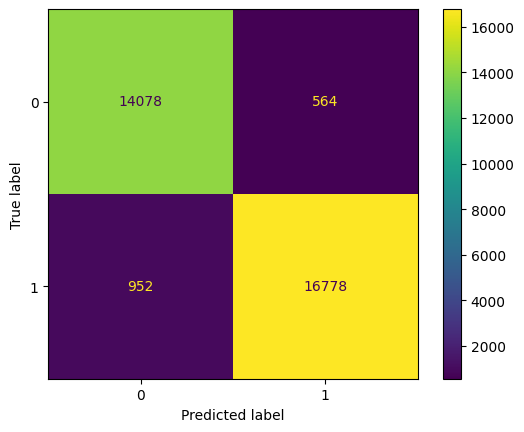

In [116]:
# confusion matrix
cm = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show()

- The random forest model predicted satisfaction with more than 95% accuracy. The precision is over 97% and the recall is approximately 95%
- The confusion matrix tree shows very high proportions for both true positives and true negatives, slightly better than results from the decision tree model built in the previous project.  
- The matrix also shows a lower proportion for both false positive and false negative with predictions resulting in a false positive or false negative only 5% of the time, which is a considerably low fail rate, even lower than that of the decision tree model

  This explains the high scores for accuracy, precision and recall